<a href="https://colab.research.google.com/github/ellenne/getAndCleanData/blob/master/KingAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.cloud import bigquery
from google.colab import auth
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [83]:
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
project_id = "king-ds-recruit-candidate-304"
client = bigquery.Client(project=project_id)

This notebook explores the data building especially the density functions for the KPIs and calculate the streak.

# Data exploration

In this part of the workbook I will do some charts for the final reports.

In [0]:
query = '''
      SELECT 
      A.abtest_group as `group`
      ,CASE
        WHEN ACT.activity_date BETWEEN '2017-04-21' AND '2017-05-03' THEN 'pre-study'
        WHEN ACT.activity_date BETWEEN '2017-05-04' AND '2017-05-22' THEN 'study'
        ELSE 'error'
      END AS period
      ,ACT.activity_date AS dates      
      ,SUM(ACT.gameends) / COUNT(DISTINCT ACT.playerid) as games_per_user
      ,SUM(ACT.purchases) / COUNT(DISTINCT ACT.playerid) as purc_per_user
      ,SUM(ACT.purchases) / SUM(ACT.gameends) as conversion
      
      FROM abtest.activity AS ACT
      JOIN abtest.assignment AS A
      ON ACT.playerid = A.playerid

      WHERE 1=1
      AND ACT.activity_date BETWEEN '2017-04-21' AND '2017-05-22'

      GROUP BY 1,2,3
      ORDER BY 1,3'''

In [0]:
query_df = client.query(query).to_dataframe()

In [87]:
query_df.head()

,group,period,dates,games_per_user,purc_per_user,conversion
0,A,pre-study,2017-04-21,13.182342,0.030486,0.002313
1,A,pre-study,2017-04-22,13.184495,0.030799,0.002336
2,A,pre-study,2017-04-23,13.181610,0.030393,0.002306
3,A,pre-study,2017-04-24,13.183644,0.030516,0.002315
4,A,pre-study,2017-04-25,13.184898,0.030382,0.002304


In [0]:
# Let's slice our dataframe so that it will be easier to have the data 
# structures needed for the charts
df_A = query_df[query_df['group'] == 'A']
df_B = query_df[query_df['group'] == 'B']
df_preStudy = query_df[query_df['period'] == 'pre-study']
df_study = query_df[query_df['period'] == 'study']

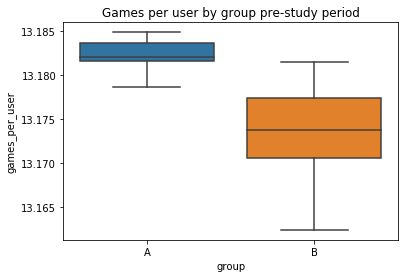

In [89]:
sns_plot1 = sns.boxplot(x='group', y='games_per_user', data=df_preStudy).set_title("Games per user by group pre-study period")

In [0]:
pic1 = sns_plot1.get_figure()
pic1.savefig("BoxPlotGamesPerUsersByGroupPreStudy.png")
files.download("BoxPlotGamesPerUsersByGroupPreStudy.png")

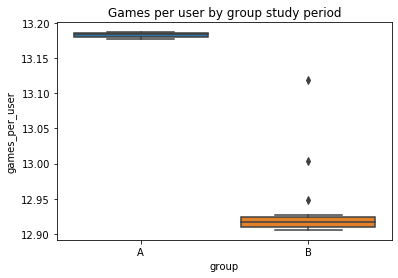

In [93]:
sns_plot2 = sns.boxplot(x='group', y='games_per_user', data=df_study).set_title("Games per user by group study period")

In [0]:
pic2 = sns_plot2.get_figure()
pic2.savefig("BoxPlotGamesPerUsersByGroupStudy.png")
files.download("BoxPlotGamesPerUsersByGroupStudy.png")

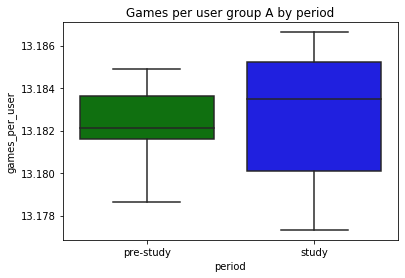

In [102]:
my_pal = {period: "green" if period == "pre-study" else "blue" for period in df_A.period.unique()}
sns_plot3 = sns.boxplot(x='period', y='games_per_user', palette=my_pal, data=df_A).set_title("Games per user group A by period")

In [0]:
pic3 = sns_plot3.get_figure()
pic3.savefig("BoxPlotGamesPerUsersGroupA_ByPeriod.png")
files.download("BoxPlotGamesPerUsersGroupA_ByPeriod.png")

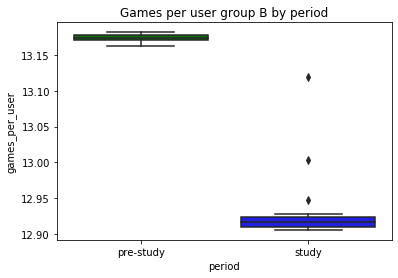

In [107]:
my_pal = {period: "green" if period == "pre-study" else "blue" for period in df_B.period.unique()}
sns_plot4 = sns.boxplot(x='period', y='games_per_user', palette=my_pal, data=df_B).set_title("Games per user group B by period")

In [0]:
pic4 = sns_plot4.get_figure()
pic4.savefig("BoxPlotGamesPerUsersGroupB_ByPeriod.png")
files.download("BoxPlotGamesPerUsersGroupB_ByPeriod.png")

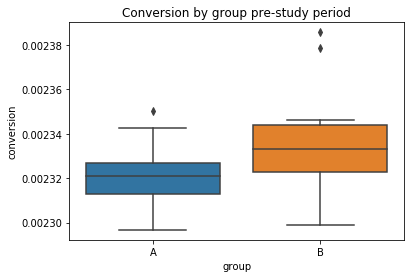

In [111]:
sns_plot5 = sns.boxplot(x='group', y='conversion', data=df_preStudy).set_title("Conversion by group pre-study period")

In [0]:
pic5 = sns_plot5.get_figure()
pic5.savefig("BoxPlotConversionByGroupPreStudy.png")
files.download("BoxPlotConversionByGroupPreStudy.png")

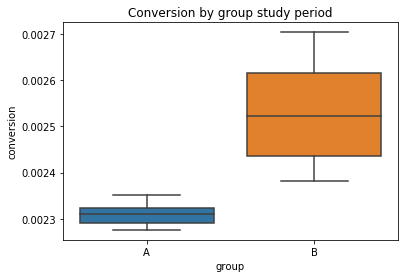

In [114]:
sns_plot6 = sns.boxplot(x='group', y='conversion', data=df_study).set_title("Conversion by group study period")

In [0]:
pic6 = sns_plot6.get_figure()
pic6.savefig("BoxPlotConversionByGroupStudy.png")
files.download("BoxPlotConversionByGroupStudy.png")

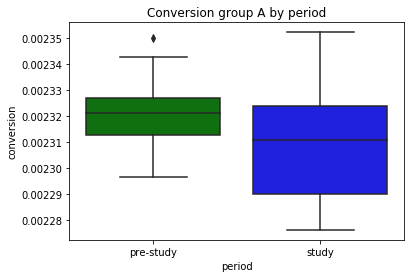

In [117]:
my_pal = {period: "green" if period == "pre-study" else "blue" for period in df_A.period.unique()}
sns_plot7 = sns.boxplot(x='period', y='conversion', palette=my_pal, data=df_A).set_title("Conversion group A by period")

In [0]:
pic7 = sns_plot7.get_figure()
pic7.savefig("ConversionGroupA_ByPeriod.png")
files.download("ConversionGroupA_ByPeriod.png")

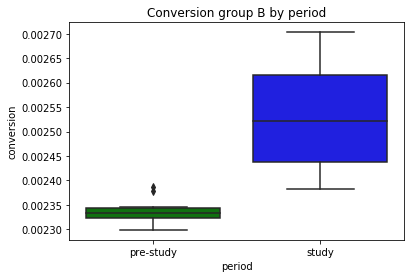

In [120]:
my_pal = {period: "green" if period == "pre-study" else "blue" for period in df_B.period.unique()}
sns_plot8 = sns.boxplot(x='period', y='conversion', palette=my_pal, data=df_B).set_title("Conversion group B by period")

In [0]:
pic8 = sns_plot8.get_figure()
pic8.savefig("ConversionGroupB_ByPeriod.png")
files.download("ConversionGroupB_ByPeriod.png")

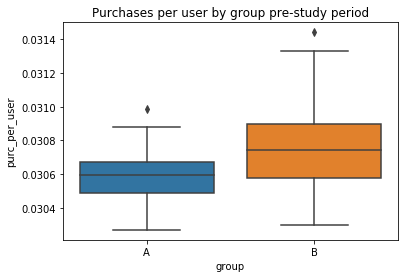

In [123]:
sns_plot9 = sns.boxplot(x='group', y='purc_per_user', data=df_preStudy).set_title("Purchases per user by group pre-study period")

In [0]:
pic9 = sns_plot9.get_figure()
pic9.savefig("BoxPlotPurchasesPerUsersByGroupPreStudy.png")
files.download("BoxPlotPurchasesPerUsersByGroupPreStudy.png")

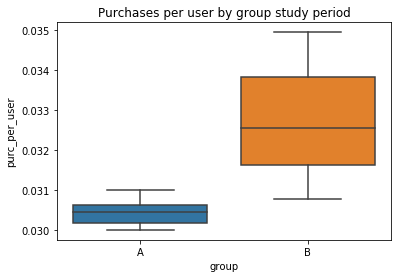

In [126]:
sns_plot10 = sns.boxplot(x='group', y='purc_per_user', data=df_study).set_title("Purchases per user by group study period")

In [0]:
pic10 = sns_plot10.get_figure()
pic10.savefig("BoxPlotPurchasesPerUsersByGroupStudy.png")
files.download("BoxPlotPurchasesPerUsersByGroupStudy.png")

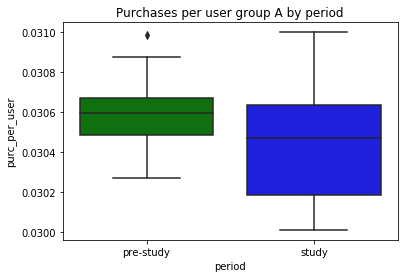

In [129]:
my_pal = {period: "green" if period == "pre-study" else "blue" for period in df_A.period.unique()}
sns_plot11 = sns.boxplot(x='period', y='purc_per_user', palette=my_pal, data=df_A).set_title("Purchases per user group A by period")

In [0]:
pic11 = sns_plot11.get_figure()
pic11.savefig("BoxPlotPurchasesPerUsersGroupA_ByPeriod.png")
files.download("BoxPlotPurchasesPerUsersGroupA_ByPeriod.png")

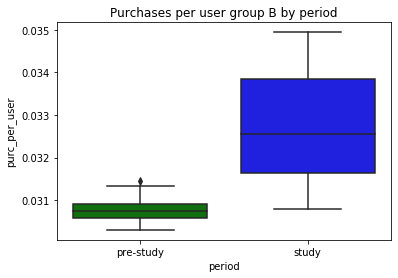

In [137]:
my_pal = {period: "green" if period == "pre-study" else "blue" for period in df_B.period.unique()}
sns_plot12 = sns.boxplot(x='period', y='purc_per_user', palette=my_pal, data=df_B).set_title("Purchases per user group B by period")

In [0]:
pic12 = sns_plot12.get_figure()
pic12.savefig("BoxPlotPurchasesByUserGroupB_ByPeriod.png")
files.download("BoxPlotPurchasesByUserGroupB_ByPeriod.png")

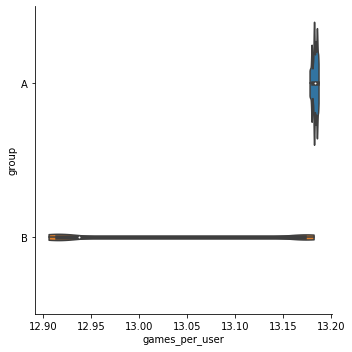

In [43]:
sns.catplot(x="games_per_user",y="group",kind='violin',bw=.15, cut=0,data=query_df)

In [45]:
df_exp = query_df[query_df['period'] == 'study']
df_exp.head()

,group,period,dates,games_per_user,purc_per_user,conversion
13,A,study,2017-05-04,13.179551,0.030555,0.002318
14,A,study,2017-05-05,13.186148,0.030470,0.002311
15,A,study,2017-05-06,13.182186,0.030389,0.002305
16,A,study,2017-05-07,13.184982,0.030673,0.002326
17,A,study,2017-05-08,13.186156,0.030126,0.002285


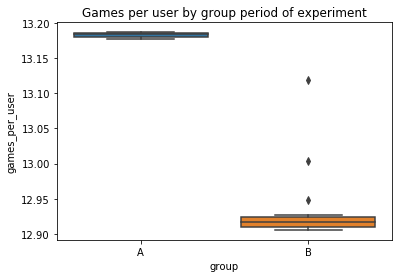

In [46]:
sns_plot1_1 = sns.boxplot(x='group', y='games_per_user', data=df_exp).set_title("Games per user by group period of experiment")

In [0]:
pic1_1 = sns_plot1.get_figure()
pic1_1.savefig("GamesPerUserExpPeriod.png")
files.download("GamesPerUserExpPeriod.png") 

Text(0.5, 0.98, 'Games per users during period of experi')

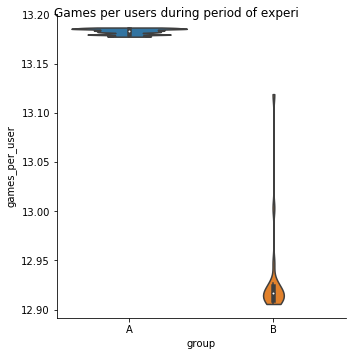

In [57]:
viol1 = sns.catplot(x="group",y="games_per_user",kind='violin',bw=.15, cut=0,data=df_exp, )
viol1.fig.suptitle('Games per users during period of experi')

In [0]:
pic1_3 = viol1.savefig("Violin_Plot_GamesPerUser_exp.png")
files.download("Violin_Plot_GamesPerUser_exp.png") 

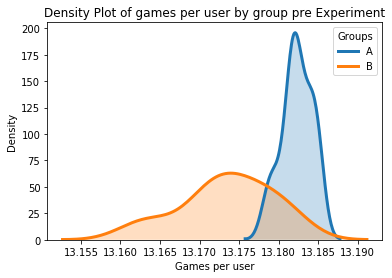

In [143]:
groups = ['A', 'B']
for group in groups:
  subset = df_preStudy[df_preStudy['group'] == group]

  sns.distplot(subset['games_per_user'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = group)

plt.legend(prop={'size': 10}, title = 'Groups')
plt.title('Density Plot of games per user by group pre Experiment')
plt.xlabel('Games per user')
plt.ylabel('Density')
pic1_1 = plt.savefig("DensityGamesPerUserPreStudy.png")
files.download("DensityGamesPerUserPreStudy.png")

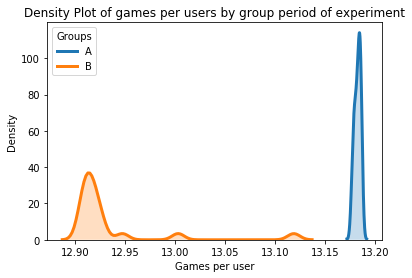

In [169]:
groups = ['A', 'B']
for group in groups:
  subset = df_study[df_study['group'] == group]

  sns.distplot(subset['games_per_user'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = group)

plt.legend(prop={'size': 10}, title = 'Groups')
plt.title('Density Plot of games per users by group period of experiment')
plt.xlabel('Games per user')
plt.ylabel('Density')
pic1_2 = plt.savefig("DensityGamesPerUserStudy.png")
files.download("DensityGamesPerUserStudy.png") 

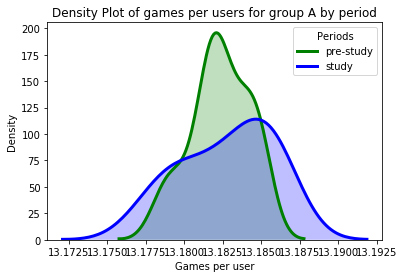

In [171]:
times = ['pre-study', 'study']
col = ['green', 'blue']
for time in times:
  subset = df_A[df_A['period'] == time]

  sns.distplot(subset['games_per_user'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 color = col[times.index(time)],
                 label = time)

plt.legend(prop={'size': 10}, title = 'Periods')
plt.title('Density Plot of games per users for group A by period')
plt.xlabel('Games per user')
plt.ylabel('Density')
pic1_3 = plt.savefig("DensityGamesPerUserGroupA.png")
files.download("DensityGamesPerUserGroupA.png") 

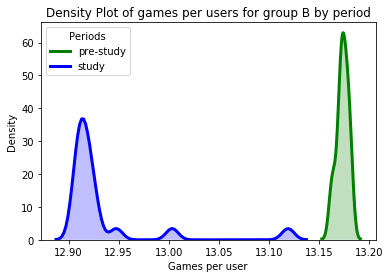

In [162]:
times = ['pre-study', 'study']
col = ['green', 'blue']
for time in times:
  subset = df_B[df_B['period'] == time]

  sns.distplot(subset['games_per_user'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 color = col[times.index(time)],
                 label = time)

plt.legend(prop={'size': 10}, title = 'Periods')
plt.title('Density Plot of games per users for group B by period')
plt.xlabel('Games per user')
plt.ylabel('Density')
pic1_4 = plt.savefig("DensityGamesPerUsersGroupB.png")
files.download("DensityGamesPerUsersGroupB.png") 

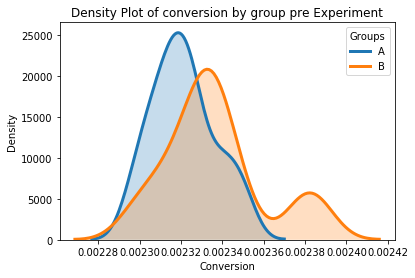

In [164]:
groups = ['A', 'B']
for group in groups:
  subset = df_preStudy[df_preStudy['group'] == group]

  sns.distplot(subset['conversion'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = group)

plt.legend(prop={'size': 10}, title = 'Groups')
plt.title('Density Plot of conversion by group pre Experiment')
plt.xlabel('Conversion')
plt.ylabel('Density')
pic2_1 = plt.savefig("DensityConversionPreStudy.png")
files.download("DensityConversionPreStudy.png")

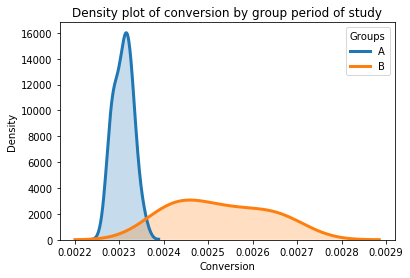

In [167]:
groups = ['A', 'B']
for group in groups:
  subset = df_study[df_study['group'] == group]

  sns.distplot(subset['conversion'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = group)

plt.legend(prop={'size': 10}, title = 'Groups')
plt.title('Density plot of conversion by group period of study')
plt.xlabel('Conversion')
plt.ylabel('Density')
pic2_2 = plt.savefig("DensityConversionStudy.png")
files.download("DensityConversionStudy.png") 

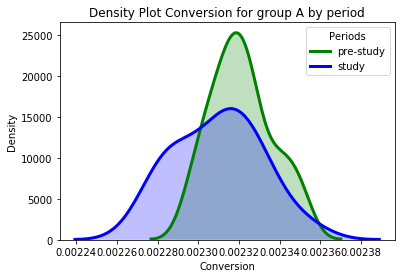

In [173]:
times = ['pre-study', 'study']
col = ['green', 'blue']
for time in times:
  subset = df_A[df_A['period'] == time]

  sns.distplot(subset['conversion'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 color = col[times.index(time)],
                 label = time)

plt.legend(prop={'size': 10}, title = 'Periods')
plt.title('Density Plot Conversion for group A by period')
plt.xlabel('Conversion')
plt.ylabel('Density')
pic2_3 = plt.savefig("DensityConversionGroupA.png")
files.download("DensityConversionGroupA.png") 

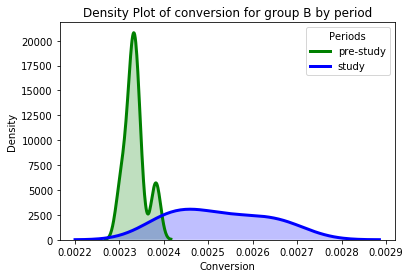

In [175]:
times = ['pre-study', 'study']
col = ['green', 'blue']
for time in times:
  subset = df_B[df_B['period'] == time]

  sns.distplot(subset['conversion'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 color = col[times.index(time)],
                 label = time)

plt.legend(prop={'size': 10}, title = 'Periods')
plt.title('Density Plot of conversion for group B by period')
plt.xlabel('Conversion')
plt.ylabel('Density')
pic2_4 = plt.savefig("DensityConversionGroupB.png")
files.download("DensityConversionGroupB.png") 

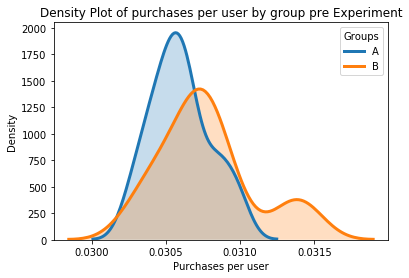

In [177]:
groups = ['A', 'B']
for group in groups:
  subset = df_preStudy[df_preStudy['group'] == group]

  sns.distplot(subset['purc_per_user'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = group)

plt.legend(prop={'size': 10}, title = 'Groups')
plt.title('Density Plot of purchases per user by group pre Experiment')
plt.xlabel('Purchases per user')
plt.ylabel('Density')
pic3_1 = plt.savefig("DensityPurchasesPerUserPreStudy.png")
files.download("DensityPurchasesPerUserPreStudy.png")

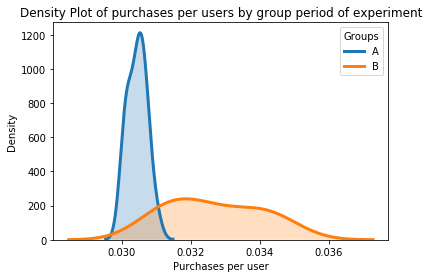

In [179]:
groups = ['A', 'B']
for group in groups:
  subset = df_study[df_study['group'] == group]

  sns.distplot(subset['purc_per_user'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = group)

plt.legend(prop={'size': 10}, title = 'Groups')
plt.title('Density Plot of purchases per users by group period of experiment')
plt.xlabel('Purchases per user')
plt.ylabel('Density')
pic3_2 = plt.savefig("DensityPurchasesPerUserStudy.png")
files.download("DensityPurchasesPerUserStudy.png") 

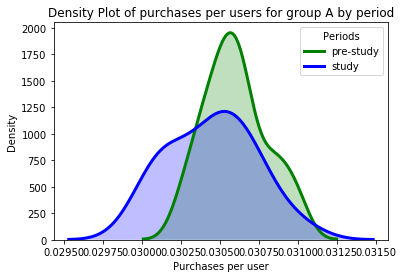

In [181]:
times = ['pre-study', 'study']
col = ['green', 'blue']
for time in times:
  subset = df_A[df_A['period'] == time]

  sns.distplot(subset['purc_per_user'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 color = col[times.index(time)],
                 label = time)

plt.legend(prop={'size': 10}, title = 'Periods')
plt.title('Density Plot of purchases per users for group A by period')
plt.xlabel('Purchases per user')
plt.ylabel('Density')
pic3_3 = plt.savefig("DensityPurchasesPerUserGroupA.png")
files.download("DensityPurchasesPerUserGroupA.png") 

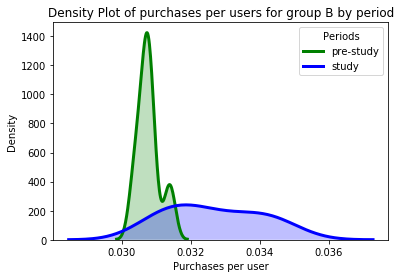

In [183]:
times = ['pre-study', 'study']
col = ['green', 'blue']
for time in times:
  subset = df_B[df_B['period'] == time]

  sns.distplot(subset['purc_per_user'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 color = col[times.index(time)],
                 label = time)

plt.legend(prop={'size': 10}, title = 'Periods')
plt.title('Density Plot of purchases per users for group B by period')
plt.xlabel('Purchases per user')
plt.ylabel('Density')
pic1_4 = plt.savefig("DensityPurchasesPerUsersGroupB.png")
files.download("DensityPurchasesPerUsersGroupB.png")

#Streak

In this part of the notebook I will try to work out the number of users who used the application for N consecutive days. <br/>
The idea is to start from a N day windows and move it by one day each time, take the unique users and then merge the current list with the previous dropping the duplicates. At the end I will be able to count the total number of users for all possible windows in a given period.<br/>
In our case the period is 2017-04-21 until 2017-05-22

In [68]:
winLB = datetime.date(2017, 4, 20)
winLimit = datetime.date(2017, 5, 22)
accumul_df = pd.DataFrame()
group = 'A'

#winLB = winLB + datetime.timedelta(days=1)
#a = print(winLB)
#a

while True:
  #yourdatetime.date() == datetime.today().date()  
  winUB = winLB + datetime.timedelta(days=4)
  if winUB == winLimit+ datetime.timedelta(days=1):
    break
  
  dayP1 = winLB + datetime.timedelta(days=1)
  dayP2 = dayP1 + datetime.timedelta(days=1)
  dayP3 = dayP2 + datetime.timedelta(days=1)
  dayP4 = dayP3 + datetime.timedelta(days=1)  

  query = f"""
  SELECT DISTINCT ACT.playerid AS users

  FROM abtest.activity AS ACT
  JOIN abtest.assignment AS A
  ON ACT.playerid = A.playerid

  WHERE 1=1
  AND A.abtest_group = '{group}'
  AND ACT.activity_date = '{winLB.strftime('%Y-%m-%d')}'
  AND ACT.playerid IN
  (
    SELECT ACT2.playerid
    FROM abtest.activity AS ACT2
    WHERE 1=1
    AND ACT2.activity_date = '{dayP1.strftime('%Y-%m-%d')}'     
  )
  AND ACT.playerid IN
  (
    SELECT ACT3.playerid
    FROM abtest.activity AS ACT3
    WHERE 1=1
    AND ACT3.activity_date = '{dayP2.strftime('%Y-%m-%d')}'
   )
  AND ACT.playerid IN
  (
    SELECT ACT4.playerid
    FROM abtest.activity AS ACT4
    WHERE 1=1
    AND ACT4.activity_date = '{dayP3.strftime('%Y-%m-%d')}'     
   )
  AND ACT.playerid IN
  (
    SELECT ACT5.playerid
    FROM abtest.activity AS ACT5
    WHERE 1=1
    AND ACT5.activity_date = '{dayP4.strftime('%Y-%m-%d')}'           
  )
  """    
  sLB = winLB.strftime('%Y-%m-%d')
  sUB = dayP4.strftime('%Y-%m-%d')
  print("Period tested " + sLB + " and " + sUB)

  #update starting LowerBound
  winLB = winLB + datetime.timedelta(days=1)

  #execute the query
  query_df = client.query(query).to_dataframe()
  print("Query result rows = " + str(query_df.shape[0]))

  #merge dataframes and delete duplicates
  if accumul_df.shape[0] == 0:
    accumul_df = query_df
  else:
    accumul_df = pd.concat([accumul_df, query_df])

  accumul_df = accumul_df.drop_duplicates().reset_index(drop=True)
  print(accumul_df.shape)

accumul_df.shape

Period tested 2017-04-20 and 2017-04-24
Query result rows = 1525997
(1525997, 1)
Period tested 2017-04-21 and 2017-04-25
Query result rows = 1533069
(1907311, 1)
Period tested 2017-04-22 and 2017-04-26
Query result rows = 1544675
(2294218, 1)
Period tested 2017-04-23 and 2017-04-27
Query result rows = 1552697
(2680020, 1)
Period tested 2017-04-24 and 2017-04-28
Query result rows = 1563409
(3070875, 1)
Period tested 2017-04-25 and 2017-04-29
Query result rows = 1575188
(3465322, 1)
Period tested 2017-04-26 and 2017-04-30
Query result rows = 1585401
(3770064, 1)
Period tested 2017-04-27 and 2017-05-01
Query result rows = 1598202
(4056421, 1)
Period tested 2017-04-28 and 2017-05-02
Query result rows = 1608494
(4320416, 1)
Period tested 2017-04-29 and 2017-05-03
Query result rows = 1619389
(4565180, 1)
Period tested 2017-04-30 and 2017-05-04
Query result rows = 1632888
(4789847, 1)
Period tested 2017-05-01 and 2017-05-05
Query result rows = 1632513
(4990568, 1)
Period tested 2017-05-02 and

(6805344, 1)

In [70]:
winLB = datetime.date(2017, 5, 4)
winLimit = datetime.date(2017, 5, 22)
accumul_df = pd.DataFrame()
group = 'A'

#winLB = winLB + datetime.timedelta(days=1)
#a = print(winLB)
#a

while True:
  #yourdatetime.date() == datetime.today().date()  
  winUB = winLB + datetime.timedelta(days=4)
  if winUB == winLimit+ datetime.timedelta(days=1):
    break
  
  dayP1 = winLB + datetime.timedelta(days=1)
  dayP2 = dayP1 + datetime.timedelta(days=1)
  dayP3 = dayP2 + datetime.timedelta(days=1)
  dayP4 = dayP3 + datetime.timedelta(days=1)  

  query = f"""
  SELECT DISTINCT ACT.playerid AS users

  FROM abtest.activity AS ACT
  JOIN abtest.assignment AS A
  ON ACT.playerid = A.playerid

  WHERE 1=1
  AND A.abtest_group = '{group}'
  AND ACT.activity_date = '{winLB.strftime('%Y-%m-%d')}'
  AND ACT.playerid IN
  (
    SELECT ACT2.playerid
    FROM abtest.activity AS ACT2
    WHERE 1=1
    AND ACT2.activity_date = '{dayP1.strftime('%Y-%m-%d')}'     
  )
  AND ACT.playerid IN
  (
    SELECT ACT3.playerid
    FROM abtest.activity AS ACT3
    WHERE 1=1
    AND ACT3.activity_date = '{dayP2.strftime('%Y-%m-%d')}'
   )
  AND ACT.playerid IN
  (
    SELECT ACT4.playerid
    FROM abtest.activity AS ACT4
    WHERE 1=1
    AND ACT4.activity_date = '{dayP3.strftime('%Y-%m-%d')}'     
   )
  AND ACT.playerid IN
  (
    SELECT ACT5.playerid
    FROM abtest.activity AS ACT5
    WHERE 1=1
    AND ACT5.activity_date = '{dayP4.strftime('%Y-%m-%d')}'           
  )
  """    
  sLB = winLB.strftime('%Y-%m-%d')
  sUB = dayP4.strftime('%Y-%m-%d')
  print("Period tested " + sLB + " and " + sUB)

  #update starting LowerBound
  winLB = winLB + datetime.timedelta(days=1)

  #execute the query
  query_df = client.query(query).to_dataframe()
  print("Query result rows = " + str(query_df.shape[0]))

  #merge dataframes and delete duplicates
  if accumul_df.shape[0] == 0:
    accumul_df = query_df
  else:
    accumul_df = pd.concat([accumul_df, query_df])

  accumul_df = accumul_df.drop_duplicates().reset_index(drop=True)
  print(accumul_df.shape)

accumul_df.shape

Period tested 2017-05-04 and 2017-05-08
Query result rows = 1636637
(1636637, 1)
Period tested 2017-05-05 and 2017-05-09
Query result rows = 1635298
(2043544, 1)
Period tested 2017-05-06 and 2017-05-10
Query result rows = 1638849
(2455355, 1)
Period tested 2017-05-07 and 2017-05-11
Query result rows = 1640702
(2867297, 1)
Period tested 2017-05-08 and 2017-05-12
Query result rows = 1639452
(3275899, 1)
Period tested 2017-05-09 and 2017-05-13
Query result rows = 1637426
(3684095, 1)
Period tested 2017-05-10 and 2017-05-14
Query result rows = 1641648
(4002561, 1)
Period tested 2017-05-11 and 2017-05-15
Query result rows = 1639966
(4292914, 1)
Period tested 2017-05-12 and 2017-05-16
Query result rows = 1642651
(4564569, 1)
Period tested 2017-05-13 and 2017-05-17
Query result rows = 1644538
(4813385, 1)
Period tested 2017-05-14 and 2017-05-18
Query result rows = 1645992
(5038864, 1)
Period tested 2017-05-15 and 2017-05-19
Query result rows = 1647708
(5240115, 1)
Period tested 2017-05-16 and

(5751343, 1)

In [71]:
winLB = datetime.date(2017, 4, 20)
winLimit = datetime.date(2017, 5, 22)
accumul_df = pd.DataFrame()
group = 'B'

#winLB = winLB + datetime.timedelta(days=1)
#a = print(winLB)
#a

while True:
  #yourdatetime.date() == datetime.today().date()  
  winUB = winLB + datetime.timedelta(days=4)
  if winUB == winLimit+ datetime.timedelta(days=1):
    break
  
  dayP1 = winLB + datetime.timedelta(days=1)
  dayP2 = dayP1 + datetime.timedelta(days=1)
  dayP3 = dayP2 + datetime.timedelta(days=1)
  dayP4 = dayP3 + datetime.timedelta(days=1)  

  query = f"""
  SELECT DISTINCT ACT.playerid AS users

  FROM abtest.activity AS ACT
  JOIN abtest.assignment AS A
  ON ACT.playerid = A.playerid

  WHERE 1=1
  AND A.abtest_group = '{group}'
  AND ACT.activity_date = '{winLB.strftime('%Y-%m-%d')}'
  AND ACT.playerid IN
  (
    SELECT ACT2.playerid
    FROM abtest.activity AS ACT2
    WHERE 1=1
    AND ACT2.activity_date = '{dayP1.strftime('%Y-%m-%d')}'     
  )
  AND ACT.playerid IN
  (
    SELECT ACT3.playerid
    FROM abtest.activity AS ACT3
    WHERE 1=1
    AND ACT3.activity_date = '{dayP2.strftime('%Y-%m-%d')}'
   )
  AND ACT.playerid IN
  (
    SELECT ACT4.playerid
    FROM abtest.activity AS ACT4
    WHERE 1=1
    AND ACT4.activity_date = '{dayP3.strftime('%Y-%m-%d')}'     
   )
  AND ACT.playerid IN
  (
    SELECT ACT5.playerid
    FROM abtest.activity AS ACT5
    WHERE 1=1
    AND ACT5.activity_date = '{dayP4.strftime('%Y-%m-%d')}'           
  )
  """    
  sLB = winLB.strftime('%Y-%m-%d')
  sUB = dayP4.strftime('%Y-%m-%d')
  print("Period tested " + sLB + " and " + sUB)

  #update starting LowerBound
  winLB = winLB + datetime.timedelta(days=1)

  #execute the query
  query_df = client.query(query).to_dataframe()
  print("Query result rows = " + str(query_df.shape[0]))

  #merge dataframes and delete duplicates
  if accumul_df.shape[0] == 0:
    accumul_df = query_df
  else:
    accumul_df = pd.concat([accumul_df, query_df])

  accumul_df = accumul_df.drop_duplicates().reset_index(drop=True)
  print(accumul_df.shape)

accumul_df.shape

Period tested 2017-04-20 and 2017-04-24
Query result rows = 380957
(380957, 1)
Period tested 2017-04-21 and 2017-04-25
Query result rows = 382265
(475913, 1)
Period tested 2017-04-22 and 2017-04-26
Query result rows = 385657
(572795, 1)
Period tested 2017-04-23 and 2017-04-27
Query result rows = 386624
(668717, 1)
Period tested 2017-04-24 and 2017-04-28
Query result rows = 388965
(766063, 1)
Period tested 2017-04-25 and 2017-04-29
Query result rows = 392299
(864513, 1)
Period tested 2017-04-26 and 2017-04-30
Query result rows = 395259
(940802, 1)
Period tested 2017-04-27 and 2017-05-01
Query result rows = 398147
(1012105, 1)
Period tested 2017-04-28 and 2017-05-02
Query result rows = 401370
(1078333, 1)
Period tested 2017-04-29 and 2017-05-03
Query result rows = 403833
(1139057, 1)
Period tested 2017-04-30 and 2017-05-04
Query result rows = 407350
(1195229, 1)
Period tested 2017-05-01 and 2017-05-05
Query result rows = 407442
(1245181, 1)
Period tested 2017-05-02 and 2017-05-06
Query r

(1699352, 1)

In [72]:
winLB = datetime.date(2017, 5, 4)
winLimit = datetime.date(2017, 5, 22)
accumul_df = pd.DataFrame()
group = 'B'

#winLB = winLB + datetime.timedelta(days=1)
#a = print(winLB)
#a

while True:
  #yourdatetime.date() == datetime.today().date()  
  winUB = winLB + datetime.timedelta(days=4)
  if winUB == winLimit+ datetime.timedelta(days=1):
    break
  
  dayP1 = winLB + datetime.timedelta(days=1)
  dayP2 = dayP1 + datetime.timedelta(days=1)
  dayP3 = dayP2 + datetime.timedelta(days=1)
  dayP4 = dayP3 + datetime.timedelta(days=1)  

  query = f"""
  SELECT DISTINCT ACT.playerid AS users

  FROM abtest.activity AS ACT
  JOIN abtest.assignment AS A
  ON ACT.playerid = A.playerid

  WHERE 1=1
  AND A.abtest_group = '{group}'
  AND ACT.activity_date = '{winLB.strftime('%Y-%m-%d')}'
  AND ACT.playerid IN
  (
    SELECT ACT2.playerid
    FROM abtest.activity AS ACT2
    WHERE 1=1
    AND ACT2.activity_date = '{dayP1.strftime('%Y-%m-%d')}'     
  )
  AND ACT.playerid IN
  (
    SELECT ACT3.playerid
    FROM abtest.activity AS ACT3
    WHERE 1=1
    AND ACT3.activity_date = '{dayP2.strftime('%Y-%m-%d')}'
   )
  AND ACT.playerid IN
  (
    SELECT ACT4.playerid
    FROM abtest.activity AS ACT4
    WHERE 1=1
    AND ACT4.activity_date = '{dayP3.strftime('%Y-%m-%d')}'     
   )
  AND ACT.playerid IN
  (
    SELECT ACT5.playerid
    FROM abtest.activity AS ACT5
    WHERE 1=1
    AND ACT5.activity_date = '{dayP4.strftime('%Y-%m-%d')}'           
  )
  """    
  sLB = winLB.strftime('%Y-%m-%d')
  sUB = dayP4.strftime('%Y-%m-%d')
  print("Period tested " + sLB + " and " + sUB)

  #update starting LowerBound
  winLB = winLB + datetime.timedelta(days=1)

  #execute the query
  query_df = client.query(query).to_dataframe()
  print("Query result rows = " + str(query_df.shape[0]))

  #merge dataframes and delete duplicates
  if accumul_df.shape[0] == 0:
    accumul_df = query_df
  else:
    accumul_df = pd.concat([accumul_df, query_df])

  accumul_df = accumul_df.drop_duplicates().reset_index(drop=True)
  print(accumul_df.shape)

accumul_df.shape

Period tested 2017-05-04 and 2017-05-08
Query result rows = 408675
(408675, 1)
Period tested 2017-05-05 and 2017-05-09
Query result rows = 408765
(510555, 1)
Period tested 2017-05-06 and 2017-05-10
Query result rows = 409822
(613492, 1)
Period tested 2017-05-07 and 2017-05-11
Query result rows = 410604
(716139, 1)
Period tested 2017-05-08 and 2017-05-12
Query result rows = 410255
(818674, 1)
Period tested 2017-05-09 and 2017-05-13
Query result rows = 410273
(921052, 1)
Period tested 2017-05-10 and 2017-05-14
Query result rows = 410842
(1000089, 1)
Period tested 2017-05-11 and 2017-05-15
Query result rows = 409732
(1072426, 1)
Period tested 2017-05-12 and 2017-05-16
Query result rows = 410366
(1140183, 1)
Period tested 2017-05-13 and 2017-05-17
Query result rows = 411209
(1202575, 1)
Period tested 2017-05-14 and 2017-05-18
Query result rows = 411051
(1258746, 1)
Period tested 2017-05-15 and 2017-05-19
Query result rows = 411037
(1308990, 1)
Period tested 2017-05-16 and 2017-05-20
Query 

(1436431, 1)

Comparing the percentages between group A and group B I found that they are similar therefore the difference between group A and group B is not in the streak. <br/><br/>

<table align="left">
<tr><td><b>Group</b></td><td><b>Period</b></td><td><b>5 day streak</b></td><td><b>Unique users</b></td><td><b>Percentage</b></td></tr>
<tr><td>A</td><td>Overall</td><td>6805344</td><td>8265610</td><td>82.33%</tr>
<tr><td>A</td><td>Pre-Test</td><td>4565180</td><td>6776037</td><td>67.37%</tr>
<tr><td>A</td><td>Test</td><td>5751343</td><td>8265610</td><td>69.58%</tr>
<tr><td>B</td><td>Overall</td><td>1699352</td><td>2065446</td><td>82.27%</tr>
<tr><td>B</td><td>Pre-Test</td><td>1139057</td><td>1692085</td><td>67.32%</tr>
<tr><td>B</td><td>Test</td><td>1436431</td><td>2065446</td><td>69.55%</tr>
</table>

